In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open('../data/cta/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv', 'rb') as read_file:
    cta_data = pd.read_csv(read_file)

In [55]:
cta_data[cta_data['stationname'] == 'UIC-Halsted']

,station_id,stationname,date,daytype,rides
0,40350,UIC-Halsted,01/01/2001,U,273
281,40350,UIC-Halsted,01/02/2001,W,1775
380,40350,UIC-Halsted,01/03/2001,W,1945
520,40350,UIC-Halsted,01/04/2001,W,2049
576,40350,UIC-Halsted,01/05/2001,W,2145
841,40350,UIC-Halsted,01/06/2001,A,729
921,40350,UIC-Halsted,01/07/2001,U,485
1074,40350,UIC-Halsted,01/08/2001,W,4663
1157,40350,UIC-Halsted,01/09/2001,W,4676
1343,40350,UIC-Halsted,01/10/2001,W,4764


In [47]:
total_rides = cta_data.groupby('stationname').sum()
len(total_rides)
list(total_rides)

['station_id', 'rides']

In [48]:
station_rows = cta_data.groupby('stationname').count()
len(station_rows)
list(station_rows)

['station_id', 'date', 'daytype', 'rides']

In [64]:
cta_rides_and_counts = pd.merge(total_rides, station_rows, left_index = True, right_index=True)
cta_rides_and_counts.drop(columns = ['station_id_x', 'date', 'daytype', 'rides_y'], inplace=True)
cta_rides_and_counts.rename(index=str, columns = {'rides_x':'total_rides', 'station_id_y':'days_counted'}, inplace=True)
cta_rides_and_counts['avg_rides_per_day'] = cta_rides_and_counts['total_rides']/cta_rides_and_counts['days_counted']

In [73]:
cta_rides_and_counts.sort_values('avg_rides_per_day', ascending=False)

,total_rides,days_counted,avg_rides_per_day
stationname,,,
Clark/Lake,91017215,6514,13972.553730
Lake/State,90064680,6515,13824.202609
Chicago/State,84466354,6513,12968.885920
95th/Dan Ryan,68933957,6488,10624.839242
Belmont-North Main,68231077,6513,10476.136496
Fullerton,66971211,6514,10281.119282
Grand/State,62406457,6516,9577.418201
O'Hare Airport,59713651,6513,9168.378781
Jackson/State,57824786,6521,8867.472167


In [74]:
cta_rides_and_counts[cta_rides_and_counts.index == 'Irving Park-Brown']

,total_rides,days_counted,avg_rides_per_day
stationname,,,
Irving Park-Brown,13946051,6514,2140.935063


In [78]:
cta_rides_and_counts[cta_rides_and_counts['avg_rides_per_day'] < 2500].sort_values('avg_rides_per_day', ascending=False)

,total_rides,days_counted,avg_rides_per_day
stationname,,,
Argyle,16286552,6519,2498.320601
Southport,15810276,6513,2427.495164
Polk,15234749,6521,2336.259623
Harlem-O'Hare,15171437,6513,2329.408414
35th/Archer,14705575,6516,2256.840853
Medical Center,14637668,6516,2246.419276
LaSalle/Van Buren,14595985,6518,2239.334919
Addison-O'Hare,14362191,6515,2204.480583
LaSalle,14241486,6516,2185.617864


In [35]:
rides = total_rides['rides']
station = total_rides.index
station

Index(['18th', '35-Bronzeville-IIT', '35th/Archer', '43rd', '47th-Dan Ryan',
       '47th-South Elevated', '51st', '54th/Cermak', '63rd-Dan Ryan', '69th',
       ...
       'Washington/State', 'Washington/Wabash', 'Washington/Wells',
       'Wellington', 'Western-Brown', 'Western-Cermak', 'Western-Forest Park',
       'Western-Orange', 'Western/Milwaukee', 'Wilson'],
      dtype='object', name='stationname', length=148)

<BarContainer object of 148 artists>

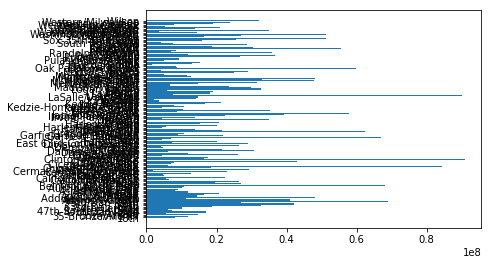

In [36]:
plt.barh(station, width=rides)